# Аналіз показників підприємcтва засобами Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
plt.style.use("dark_background")
#import pandahouse as ph

In [43]:
fb = pd.read_csv('C:/Users/User/Downloads/pseudo_facebook.csv')            

In [44]:
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<!-- ### Вопросы
Какая аудитория наиболее заинтересована в продукте, и какие группы пользователей существуют? 

Какова реакция аудитории на определенную кампанию или продукт, и какие изменения нужно внести, чтобы увеличить эффективность?

Как определить дропнушихся юзеров, как их можно привлечь назад?

Зайти на поле конкурентов -->


# Передбачити хто дропнеться
Навіщо це потрібно робити? Те, що користуватися крутитися у нас по суті це наш капітал!

ми крутимо рекламу, може купити платні стікери.
сума за якоюсь метрикою мало про що зміє сказати, тому що користувач буквально міг пару тижнів тому прийти
та подивитися хто більше залучений 100 з 100 лайків так, здавалося б що лайків менше але ctr конверсія значно більше
скільки нових друзів за час

як зрозуміти драпнутися чи ні? найпростіше це коли видаляють обліковий запис. Але це рідко і просто перестають заходити.
як зрозуміти скільки часу має рахувати з останнього заходу, наприклад. Можна взяти тих, хто два тижні не заходив, тут же питання, а чому два, а не три?
як визначити цю різницю. Якщо я скажу що людина не заходила день у Фейсбук.. не означає, що не зайде взагалі, а якщо рік не заходила.. а ось як знайти ту золоту серединку з 95% ймовірністю що все як з варіантів
1) взяти користувачів яких ми визначили, що вони дропнулися, і застосувати цей час сюди

In [45]:
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [46]:
fb.groupby('tenure').agg({'friend_count':'sum'}).sort_values('tenure',ascending=False)

,friend_count
tenure,
3139.0,2784
3129.0,720
3128.0,4658
3101.0,1164
3019.0,1041
...,...
4.0,1376
3.0,1287
2.0,2565


In [220]:
#fb.groupby('tenure').agg({'friend_count':'sum'}).sort_values('tenure',ascending=False).rolling(10).mean().plot()

In [179]:
fb.groupby('tenure').agg({'friendships_initiated':'sum'}).sort_values('tenure',ascending=False)

,friendships_initiated
tenure,
3139.0,580
3129.0,282
3128.0,972
3101.0,497
3019.0,678
...,...
4.0,1124
3.0,940
2.0,1375


In [215]:
#fb.groupby('tenure').agg({'friendships_initiated':'sum'}).sort_values('tenure',ascending=False).rolling(10).mean().plot()

In [58]:
import plotly.graph_objects as go
import plotly.io as pio

# pio.templates["plotly_dark_custom"] = go.layout.Template(
#     custom definitions here)
pio.templates.default = "plotly_dark_custom"

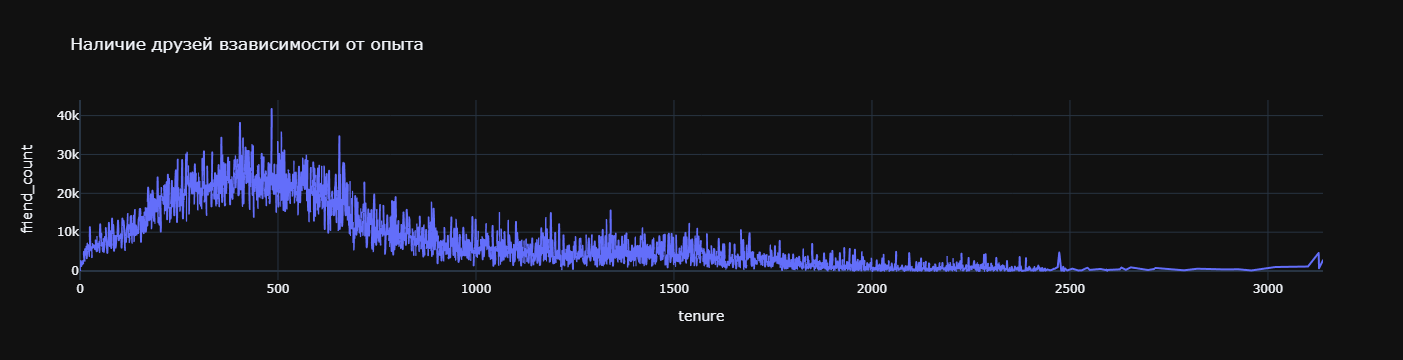

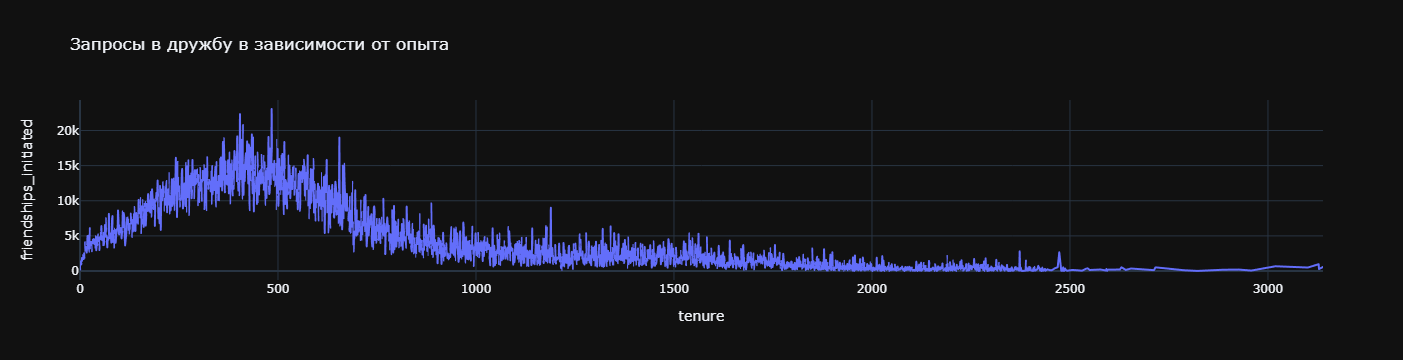

<Figure size 1000x800 with 0 Axes>

In [60]:
plt.figure(figsize = (10,8))
import plotly.express as px

df = fb.groupby('tenure',as_index=False).agg({'friend_count':'sum'}).sort_values('tenure',ascending=False)
fig = px.line(df, x="tenure", y="friend_count", title='Наличие друзей взависимости от опыта')
fig.show()

df = fb.groupby('tenure',as_index=False).agg({'friendships_initiated':'sum'}).sort_values('tenure',ascending=False)
fig = px.line(df, x="tenure", y="friendships_initiated", title='Запросы в дружбу в зависимости от опыта')
fig.update_layout(
)
fig.show()

In [224]:
fb              

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [ ]:
#скачок по приросту 
#total ctr

In [86]:
fb_2 = fb[['tenure','friend_count','friendships_initiated','likes','ctr_likes', 'userid']]

In [88]:
fb_2['total_ctr'] = fb_2['friend_count'] + fb_2['friendships_initiated'] + fb_2['likes']/fb_2['tenure']

C:\Users\User\AppData\Local\Temp\ipykernel_7964\4154043042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_2['total_ctr'] = fb_2['friend_count'] + fb_2['friendships_initiated'] + fb_2['likes']/fb_2['tenure']


In [225]:
fb_2.head()

,tenure,friend_count,friendships_initiated,likes,ctr_likes,userid,total_ctr,indicator_ctr,indicator_of_days,is_gone_user
0,266.0,0,0,0,0.0,2094382,0.0,True,False,False
1,6.0,0,0,0,0.0,1192601,0.0,True,False,False
2,13.0,0,0,0,0.0,2083884,0.0,True,False,False
3,93.0,0,0,0,0.0,1203168,0.0,True,False,False
4,82.0,0,0,0,0.0,1733186,0.0,True,False,False


In [77]:
# в конце обязательно проверить уников 
# мерджим, агригируем и синтасичиской ошибки не будет ничего не сломаеться

3139.0

In [90]:
fb_2.userid.nunique()

99003

<Axes: xlabel='total_ctr', ylabel='Count'>

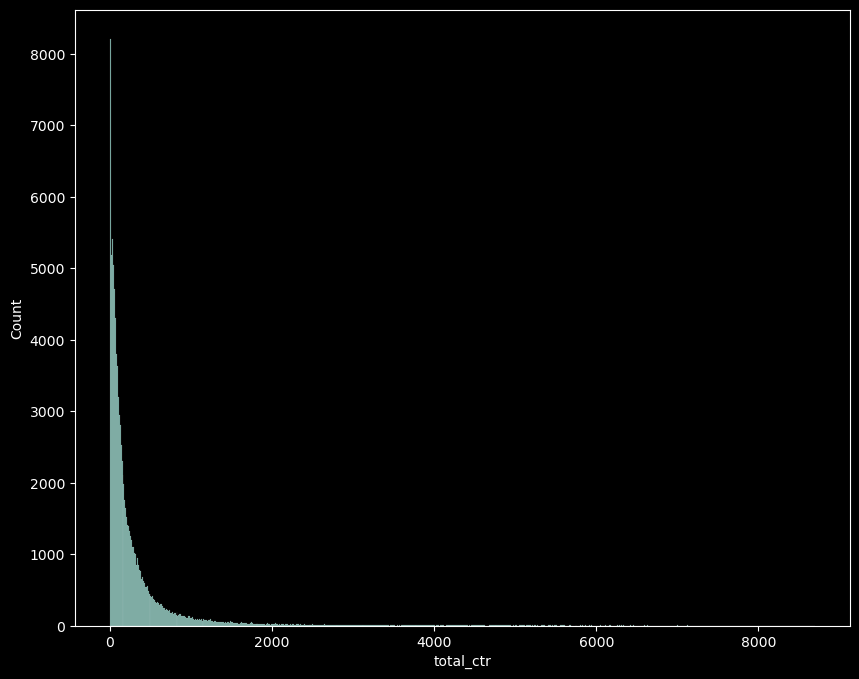

In [94]:
plt.figure(figsize=(10,8))
sns.histplot(fb_2.total_ctr)

In [98]:
total_ctr = fb_2.total_ctr

<Axes: xlabel='total_ctr', ylabel='Count'>

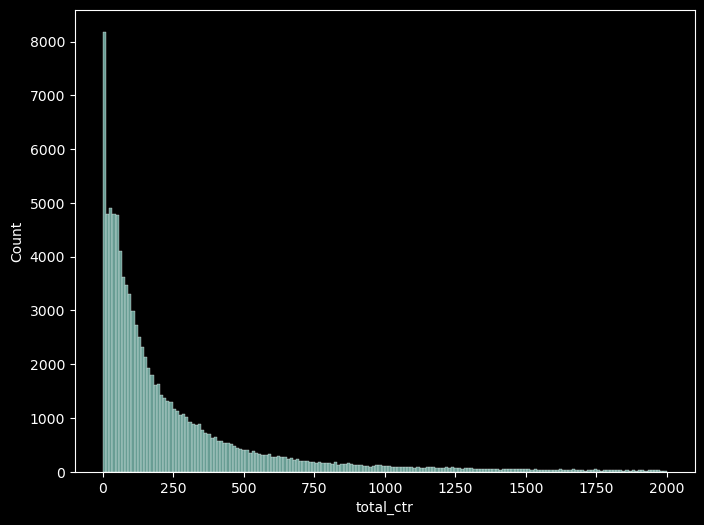

In [100]:
plt.figure(figsize=(8,6))
sns.histplot(total_ctr[total_ctr<2000])

возьмем где-то 850, посерединке между тем и тем. Ипользуем чтобы определить это кто дропнулся а кто нет.
У нас не платформа курсов, там где мы можем дойти до какого то конца, получить сертификат и все
мы не можем тут наложить ограничение что вот имеет сертификат но не заходил месяц не будет дропнувшимся а если не имеет и не заходил то дропнувшийся
в нашем случае пытаемся предсказать по таким состаляющим 
нету никаких попіток решить перейти дальше работаем с тем что есть

In [166]:
threshold_ctr  = fb_2.total_ctr.quantile(0.50)
threshold_days = fb_2.tenure.quantile(0.80)

In [235]:
fb_2['indicator_ctr']     = (fb_2.total_ctr<threshold_ctr) 
fb_2['indicator_of_days'] = fb_2.tenure>threshold_days

C:\Users\User\AppData\Local\Temp\ipykernel_7964\1342215362.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_7964\1342215362.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
fb_2.query('is_gone_user==True')

,tenure,friend_count,friendships_initiated,likes,ctr_likes,userid,total_ctr,indicator_ctr,indicator_of_days,is_gone_user
224,969.0,0,0,0,0.000000,1483400,0.000000,True,True,True
304,1244.0,0,0,0,0.000000,1787342,0.000000,True,True,True
307,797.0,0,0,0,0.000000,1804604,0.000000,True,True,True
311,1610.0,0,0,0,0.000000,2015792,0.000000,True,True,True
356,1486.0,0,0,0,0.000000,1156825,0.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...
58725,2356.0,113,18,23,0.009762,1355786,131.009762,True,True,True
58810,1726.0,114,15,42,0.024334,1819819,129.024334,True,True,True
59015,1059.0,112,16,166,0.156752,2082832,128.156752,True,True,True
59446,1546.0,116,3,2,0.001294,2003654,119.001294,True,True,True


In [248]:
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [253]:
fb.age.max()

113

In [254]:
fb.dob_day.unique()

array([19,  2, 16, 25,  4,  1, 14, 22,  5, 21, 28,  7, 30, 23, 13, 17,  3,
       11, 24, 15, 10, 20,  8, 29,  9,  6, 31, 12, 27, 18, 26],
      dtype=int64)

In [255]:
fb.dob_year.unique()

array([1999, 2000, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
       1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
       1967, 1966, 1965, 1963, 1964, 1962, 1961, 1960, 1959, 1958, 1957,
       1956, 1955, 1954, 1953, 1952, 1950, 1951, 1949, 1948, 1946, 1947,
       1945, 1944, 1943, 1942, 1940, 1941, 1939, 1937, 1935, 1934, 1929,
       1925, 1923, 1921, 1919, 1918, 1916, 1913, 1906, 1905, 1920, 1932,
       1911, 1936, 1933, 1938, 1931, 1912, 1910, 1928, 1915, 1907, 1930,
       1926, 1924, 1922, 1917, 1927, 1901, 1900, 1909, 1908, 1914, 1902,
       1904, 1903], dtype=int64)

In [257]:
fb.gender.unique()

array(['male', 'female', nan], dtype=object)

In [258]:
fb.tenure.min()

0.0

In [259]:
fb.tenure.max()

3139.0

In [265]:
likes_bugs = fb. mobile_likes+fb.www_likes
likes_received_bug = fb.mobile_likes_received + fb.www_likes_received

In [268]:
(fb.likes == likes_bugs).value_counts()

True    99003
dtype: int64

In [269]:
(fb.likes_received == likes_received_bug).value_counts()

True     98999
False        4
dtype: int64

In [272]:
(fb.likes_received > likes_received_bug).value_counts()

False    98999
True         4
dtype: int64

# Retention Rate

Вимірювання ефективності нових функцій: Facebook може використовувати retention rate для вимірювання того, наскільки успішно нові функції приймаються користувачами та залишаються на платформі.
Якщо retention rate високий для нової функції, це може означати, що вона має попит у користувачів і покращує їх досвід використання Facebook.

Якщо ваш retention rate високий, це може означати, що ваші користувачі задоволені продуктом і мабуть будуть продовжувати з вами працювати в майбутньому. У цьому випадку ви можете продовжувати зосереджуватися на покращенні продукту та залученні нових клієнтів.

Якщо ваш retention rate низький, це може свідчити про проблеми з продуктом, які відштовхують користувачів. У цьому випадку вам потрібно дослідити, чому користувачі не залишаються з вами, і що можна поліпшити продукт, щоб утримувати їх.

Якщо retention rate у вас знижується з часом, це може означати, що ваш продукт застарілий або конкуренти пропонують більш привабливі умови. У цьому випадку вам потрібно регулярно оновлювати продукт та стежити за конкурентами, щоб залишатися конкурентоспроможними.

Якщо retention rate у вас високий, але кількість нових клієнтів низька, це може означати, що ви не залучаєте достатньо нових користувачів. У цьому випадку вам потрібно звернути увагу на маркетинг та просування продукту, щоб залучити нових клієнтів.

# Прийшов до нас менеджер і каже, що команда вирішила впровадити Live Audio Rooms - можливість створення та приєднання до аудіоконференцій у Facebook. 
Подивіться на утримання користувачів у перші сто днів. Оцініть retention rate, який висновок щодо утримання ми можемо зробити. Графік з якихось причин не виходить на плато, можемо побачити відтік клієнтів. Значить, що функція не зовсім пішла добре!!

за великим рахунком нам не важливо утримання користувача утримання прибутку утримання це завжди добре.
для соціальної мережі це 2-3 дні. Він може показувати спочатку але не точно або нам доведеться довго чекати
70% багато чи мало як це? чи потрібно збільшувати
перші три підходи
1) як ми використовуємо свій продукт люди в команді
взяли 10 чоловік і дивимося як вони його використовують
2) вивчити ринок та вивчити показники хороші для нашої області до якого показника прагнути чат який?
3) орієнтуватися на досвід які показники були у схожого ??

2 блоки
1) що у нас вже класний продукт просто більше додати навчання і розповісти про якісь фічі
2) перевірка гіпотез додамо щось нове
навчання поділити користувачів на когорти та порівнювати
наприклад може бути такий результат, що людина купує передплату на музику і очевидно, що найближчий час вона буде їй користуватися.
а якщо ні то це говорить швидше про часте але можливо не регулярне використання
і ось спочатку коли ми знайомимося з користувачем ми повинні сфокусуватися на тих сценаріях, які зацікавлять користувача

починаємо порівнювати дві когорти з'ясовується що одним добре будуємо рекоміндації багато сигналів то любить ця людина вони часто заходять
інші ні, значить ми можемо кинути їм ідею що лайкати музику це добре і тим самим ми більше можемо оцінити що подобається
нагадати про функціональність якщо людина засинає включає будильник скажімо а давайте включимо звук залізниці

# Ми впровадили нову функцію Live Audio Rooms подивитися чи був приріст Retention починаючи від 2015-07-01

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K')

In [3]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [4]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [5]:
df['reg_month'] = df['reg_date'].apply(lambda x : x.replace(day=1))

In [6]:
df['transaction_month'] = df['transaction_date'].apply(lambda x : x.replace(day=1))

In [7]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [16]:
 users = df.groupby('user_id',as_index = False).agg({'reg_month':'min'})

In [17]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [18]:
month

,0
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [19]:
month.columns = ['month']

In [20]:
users['key'] = 1
month['key'] = 1

In [21]:
template = users.merge(month,on='key')[['user_id','reg_month','month']]

In [27]:
template.head(30)

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
5,-37599,2015-01-01,2015-06-01
6,-37599,2015-01-01,2015-07-01
7,-37599,2015-01-01,2015-08-01
8,-37599,2015-01-01,2015-09-01
9,-37599,2015-01-01,2015-10-01


In [14]:
template = template.query('month >= reg_month')

In [15]:
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [24]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [25]:
trans_month

,user_id,transaction_month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


In [26]:
trans_month.columns = ['user_id','month','revenue']

In [27]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

In [28]:
report

,user_id,reg_month,month,revenue
0,-37599,2015-01-01,2015-01-01,NaN
1,-37599,2015-01-01,2015-02-01,NaN
2,-37599,2015-01-01,2015-03-01,1182.0
3,-37599,2015-01-01,2015-04-01,NaN
4,-37599,2015-01-01,2015-05-01,NaN
...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN
467621,138987,2014-10-01,2015-08-01,NaN
467622,138987,2014-10-01,2015-09-01,NaN
467623,138987,2014-10-01,2015-10-01,NaN


In [29]:
report['active'] = (report['revenue'] > 0)*1

In [30]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')
# процент акт польз
# amount of users
# sum amount of active users 

In [31]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


In [32]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [33]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [38]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

In [39]:
retention 

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='lifetime', ylabel='reg_month'>

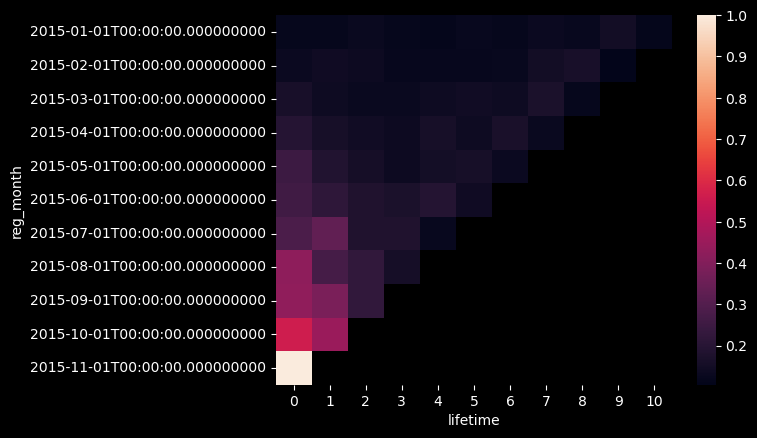

In [41]:
sns.heatmap(retention)

# P-Value

# команда Facebook провела А/В тест Завданням тесту було перевірити який інтерфейс краще для нашої кімнати старий чи новий. Для тесту 70% людей залишили старий, а 30% показали новий. В результаті розрахувати Р-Value для нашої нової функції і перевірити чи є відмінності між тестами? В кінці користувач може проголосувати чи подобається йому наш інтерфейс


In [78]:
df = pd.DataFrame({'group':['old view (A)', 'new view (B)'],
                   'showing':[700_000,300_000], 'likes':[70_000,48_000]})

In [79]:
df

,group,showing,likes
0,old view (A),700000,70000
1,new view (B),300000,48000


In [80]:
df['ctr'] = df['likes'] / df['showing']

In [81]:
df # а вдруг це випадковість? і якщо можно було б перезавантажувати цей тест були б інші результати ? Треба звести цю історію до ймовірності. Щоб використати метод Монте-Карло

,group,showing,likes,ctr
0,old view (A),700000,70000,0.10
1,new view (B),300000,48000,0.16


Як правило нульова гіпотеза формується с того що різниці немає, яка ймовірність що вони однакові отримати такі й більше відмінності

In [82]:
(70_000 + 48_000) / 1000_000 #ймовірність конвертнутися 

0.118

In [83]:
np.random.binomial(1,0.118,size=700_000).mean() #генератор виборок

0.11836571428571428

In [84]:
np.random.binomial(1,0.118,size=300_000).mean() #генератор виборок

0.11779333333333333

In [86]:
# можемо побачити що може бути й гірше новий. Давати конверсію менше ніж старий. Потрібно в ймовірність включати ймовірність в обидві сторони

In [90]:
np.random.binomial(1,0.118,size=300_000).mean() - np.random.binomial(1,0.118,size=700_000).mean() # Значить що гірше, нам не всеодно що може нове бути та гірше

-0.0006566666666666665

In [91]:
abs(0.10 - 0.16) #різниця в обидві строни

0.06

In [94]:
abs(np.random.binomial(1,0.118,size=300_000).mean() 
- np.random.binomial(1,0.118,size=700_000).mean()) >= 0.06

False

In [98]:
[abs(np.random.binomial(1,0.118,size=300_000).mean()                            #монте-карло
- np.random.binomial(1,0.118,size=700_000).mean()) >= 0.06 for _ in range(10)] #яка ймовірність що вони однакові отримати такі й більше відмінності , > or >=  чим в нашому тесті

[False, False, False, False, False, False, False, False, False, False]

In [101]:
np.mean([abs(np.random.binomial(1,0.118,size=300_00).mean() 
- np.random.binomial(1,0.118,size=700_000).mean()) >= 0.06 for _ in range(1000)])

0.0

In [ ]:
df